In [2]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
X = faces.data
y = faces.target
print(X.data.shape)

(400, 4096)


In [3]:
# aplique min-max scaler al dataset
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(faces.data)

In [4]:
# Transforma el dataset con PCA para retener 95% de la varianza
from sklearn.decomposition import PCA

n_components=400
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=400)

In [5]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

min_var(0.95, pca.explained_variance_ratio_)

121

In [6]:
n_components = 121
pca95 = PCA(n_components=n_components)
X_pca95 = pca95.fit_transform(X)

In [13]:
# sobre el dataset, construya una proyeccion t-SNE, justifique la eleccion de parametros
from sklearn.manifold import TSNE

tsne_embed = TSNE(n_components=2, perplexity=20, n_iter=500, n_iter_without_progress=100, n_jobs=10)
projection = tsne_embed.fit_transform(X_pca95, y)

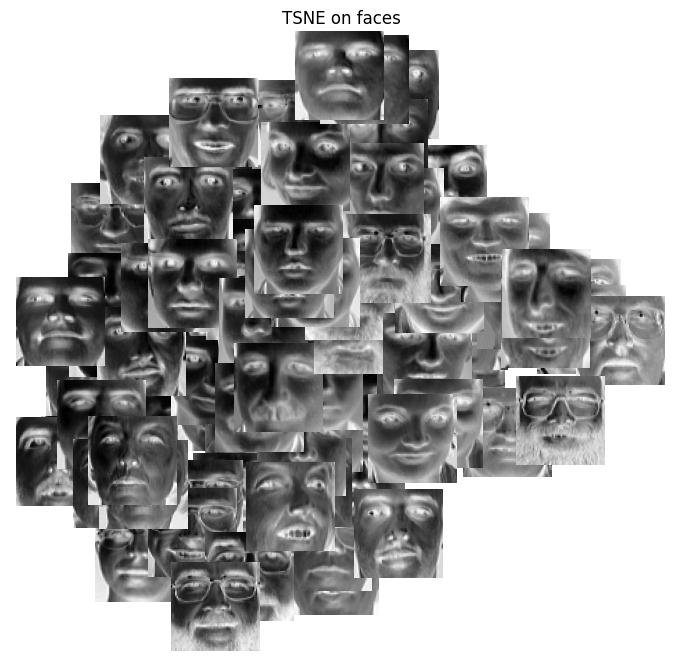

In [15]:
# visualice la proyeccion
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title):
    _, ax = plt.subplots(figsize=(8, 8))
    X = MinMaxScaler().fit_transform(X)

    for label in np.unique(y):
        ax.scatter(
            *X[y == label].T,
            marker=f"${label}$",
            color=plt.cm.Dark2(label),
            alpha=0.425,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big for initialization
    for i in range(X.shape[0]):
        # Calculate the min distance between current point and all the shown images
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 2e-3: 
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(faces.images[i], cmap=plt.cm.gray_r),
            X[i],
            frameon=False
        )
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

plot_embedding(projection, "TSNE on faces")
plt.show()

In [16]:
import umap.umap_ as umap

ModuleNotFoundError: No module named 'umap'